In [1]:
%matplotlib inline
import sys
sys.path.append('../..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import load_model

Using TensorFlow backend.


In [2]:
from tools import open_file, norm

In [13]:
rawfile = open_file('h5py', 'raw data/daily_futures.h5', mode="r")
model = load_model('../../data/keras models/trend_20day.h5')
savefile = open_file('h5py', 'custom/ohlc_trend(20).h5', mode="w")

In [14]:
'''
index N의 trend index는
N-period 에서 N-1 동안의 period 일에 대한 trend index임

'''
window = 20
for idx, file in enumerate(rawfile.values()):
    if file.attrs['symbol'] == 'None':
        continue
    
    name = file.attrs['name']
    print("\rprocessing %s...(%s/%s)            "%(name, idx, len(rawfile)),end='', flush=True)
    columns = ['date', 'open','high','low','close','volume','open interest']
    raw_data = pd.DataFrame(file.value, columns=columns)
    trend=[np.nan for i in range(window)]
    
    for i in range(window, len(raw_data)):
        data = raw_data[i-window:i][['open','high','low','close']]
        data = norm(data)
        
        pred = model.predict(np.array([data.values]))[0]
        #trend.append(pred.argmax())
        
        if pred[0] > pred[2]: #downtrend
            trend.append(-pred[0])
        else: #uptrend
            trend.append(pred[2])
        
    raw_data['trend'] = pd.DataFrame(trend)
    raw_data = raw_data[window:][['date','open','high','low','close','trend']]
    dset = savefile.create_dataset(file.attrs['symbol'], shape=raw_data.shape, data=raw_data.values)
    dset.attrs['name'] = file.attrs['name']
    dset.attrs['symbol'] = file.attrs['symbol']

processing ICE Russell 2000 Index Mini...(63/77)              

In [15]:
savefile.attrs['columns'] = 'date;open;high;low;close;trend'

In [16]:
rawfile.close()
savefile.close()

In [30]:
from collections import Counter

In [17]:
raw_data['date'] = raw_data.date.astype('M8[s]')

In [18]:
raw_data.set_index('date',inplace=True)

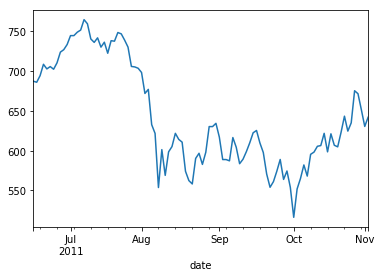

In [19]:
raw_data.iloc[1200:1300].close.plot()

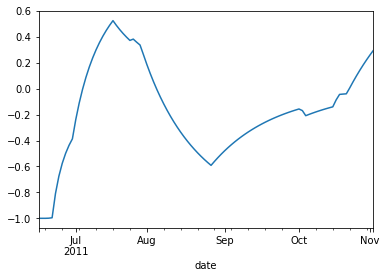

In [20]:
raw_data.iloc[1200:1300].trend.ewm(20).mean().plot()

In [21]:
f = h5py.File(trainedfile, "r")

In [38]:
trend = np.array([])
for file in f.values():
    trend = np.append(trend, file.value[:,4])

In [42]:
Counter(trend)

Counter({0.0: 30492, 1.0: 105057, 2.0: 47026})

In [27]:
v.attrs['symbol']

'None'

In [26]:
np.hstack(([[1],[2]],[[3],[4]]))

array([[1, 3],
       [2, 4]])

In [8]:
a=[[1,2,3],[4,5,6]]

In [9]:
pd.DataFrame(a)

,0,1,2
0,1,2,3
1,4,5,6
